<a href="https://colab.research.google.com/github/prtk0007/Pneumonia-Covid19-detection/blob/main/Binary_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:32<00:00, 35.9MB/s]
100% 2.29G/2.29G [00:32<00:00, 74.8MB/s]


In [ ]:
!unzip \*.zip

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/chest_xray/chest_xray/train'
valid_path = '/content/chest_xray/chest_xray/test'

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/chest_xray/chest_xray/train/*')
folders

['/content/chest_xray/chest_xray/train/NORMAL',
 '/content/chest_xray/chest_xray/train/PNEUMONIA']

In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.layers import Dropout
x = Flatten(name='flatten')(vgg.output)
x = Dense(512, activation='relu', name='fc1')(x)
x = Dropout(0.3, name='drop1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.3, name='drop2')(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(
  loss='binary_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) 
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/chest_xray/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            shuffle=False,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory('/content/chest_xray/chest_xray/val',
                                            target_size = (224, 224),
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# early = EarlyStopping(monitor='val_accuracy', mode='min', patience=10)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 7, verbose=1,factor=0.3, min_lr=0.001)
# callbacks_list = [ early, learning_rate_reduction]

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15
)

Epoch 1/15
82/82 [==============================] - 108s 1s/step - loss: 0.4205 - accuracy: 0.8114 - val_loss: 0.2947 - val_accuracy: 0.8750
Epoch 2/15
82/82 [==============================] - 104s 1s/step - loss: 0.1896 - accuracy: 0.9256 - val_loss: 0.2686 - val_accuracy: 0.9006
Epoch 3/15
82/82 [==============================] - 103s 1s/step - loss: 0.1637 - accuracy: 0.9404 - val_loss: 0.4511 - val_accuracy: 0.8574
Epoch 4/15
82/82 [==============================] - 103s 1s/step - loss: 0.1416 - accuracy: 0.9452 - val_loss: 0.3442 - val_accuracy: 0.8798
Epoch 5/15
82/82 [==============================] - 104s 1s/step - loss: 0.1370 - accuracy: 0.9463 - val_loss: 0.2771 - val_accuracy: 0.9119
Epoch 6/15
82/82 [==============================] - 104s 1s/step - loss: 0.1212 - accuracy: 0.9467 - val_loss: 0.2955 - val_accuracy: 0.9038
Epoch 7/15
82/82 [==============================] - 104s 1s/step - loss: 0.1178 - accuracy: 0.9547 - val_loss: 0.2886 - val_accuracy: 0.9022
Epoch 8/15
82

In [ ]:
model.evaluate(training_set)

In [ ]:
model.evaluate(test_set)

10/10 [==============================] - 6s 505ms/step - loss: 0.2942 - accuracy: 0.9087


[0.294225811958313, 0.9086538553237915]

In [ ]:
preds_binary = model.predict(test_set,verbose=1)


10/10 [==============================] - 6s 547ms/step


In [ ]:
predictions = preds_binary.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

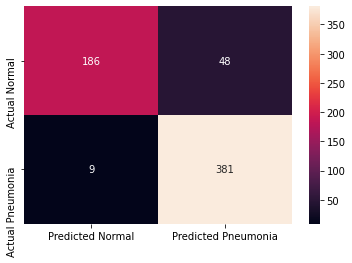

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test_set.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.95      0.79      0.87       234
   PNEUMONIA       0.89      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Kaggle/model_vgg19.h5')